In [ ]:
# Generate Images

In [75]:
import numpy as np

def load_rawimg(path):
    img = np.load(path)
    return img

In [76]:
img = load_rawimg('data/sim_data.npy')

bvals = np.array([0, 4, 8, 16, 30, 60, 120, 250, 500,
                  1000, 1200, 1400, 1600, 1800, 2000])

imgs_means = np.zeros(bvals.shape,  dtype=np.float64)
imgs_erros = np.zeros(bvals.shape, dtype=np.float64)

for i in range(len(bvals)):
    imgs_means[i] = np.mean(img[:,:,0,i])
    imgs_erros[i] = np.std(img[:,:,0,i])

#plt.plot(bvals, imgs_means, 'o', color='black')

bvals_realcurve = np.linspace(0,2000,2000)

realcurve = (1-0.2)*np.exp(-bvals_realcurve*0.00081) + 0.2*np.exp(-bvals_realcurve*0.022)


(-0.5, 99.5, 99.5, -0.5)

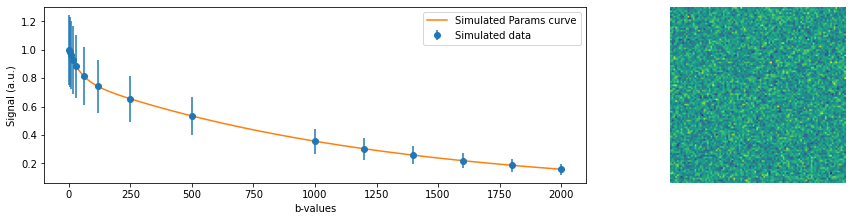

In [105]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_figheight(11)
fig.set_figwidth(15)

ax1 = plt.subplot2grid(shape=(3, 3), loc=(0, 0), colspan=2)
ax2 = plt.subplot2grid(shape=(3, 3), loc=(0, 2))

ax1.errorbar(bvals, imgs_means, imgs_erros, marker='o', fmt='.', label='Simulated data')
ax1.plot(bvals_realcurve,realcurve, label='Simulated Params curve')

ax1.legend()
ax1.set_xlabel('b-values')
ax1.set_ylabel('Signal (a.u.)')

ax2.imshow(img[:,:,0,0], clim=(0,1.85))
ax2.axis('off')


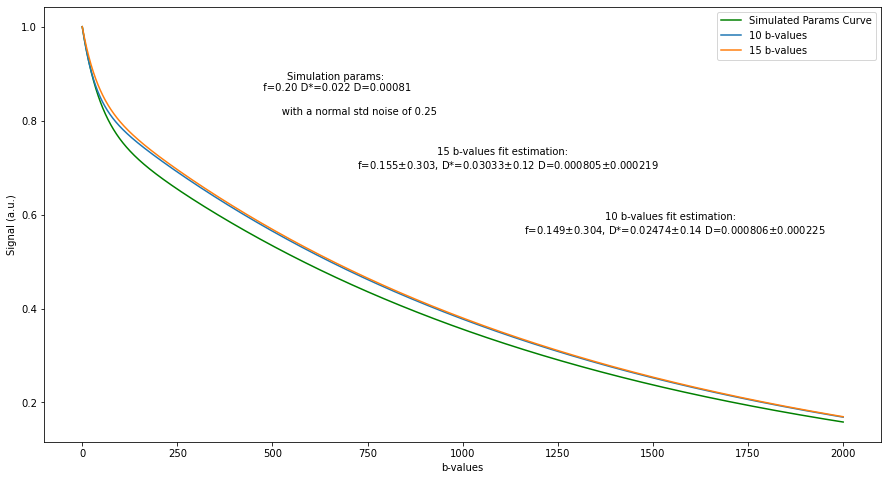

In [1]:
import numpy as np
from scipy.interpolate import splprep, splev

import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

bvals_realcurve = np.linspace(0,2000,2000)

realcurve = (1-0.2)*np.exp(-bvals_realcurve*0.00081) + 0.2*np.exp(-bvals_realcurve*0.022)

curve10b = (1-0.15547)*np.exp(-bvals_realcurve*0.0008052) + 0.15547*np.exp(-bvals_realcurve*0.0303275)
yerror10bp = (1-(0.15547+0.3044))*np.exp(-bvals_realcurve*(0.0008052+0.00022539)) + (0.15547+0.3044)*np.exp(-bvals_realcurve*(0.0303275+0.13804))
yerror10bn = (curve10b-yerror10bp) + curve10b

curve15b = (1-0.14943)*np.exp(-bvals_realcurve*0.00080614) + 0.14943*np.exp(-bvals_realcurve*0.024741)
yerror15bp = (1-(0.14943+0.30285))*np.exp(-bvals_realcurve*(0.00080614+0.00021997)) + (0.14943+0.30285)*np.exp(-bvals_realcurve*(0.024741+0.11734))
yerror15bn = (curve15b-yerror15bp) + curve15b


# Error amplitudes depending on the curve parameter *t*
# (actual values are arbitrary and only for illustrative purposes):
#err = 0.05 * np.sin(2 * t) ** 2 + 0.04 + 0.02 * np.cos(9 * t + 2)

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)

#ax.errorbar(bvals, imgs_means, imgs_erros, marker='o', fmt='.', color='g')
ax.plot(bvals_realcurve,realcurve, label='Simulated Params Curve', color='g')
ax.plot(bvals_realcurve,curve10b, label='10 b-values')
ax.plot(bvals_realcurve,curve15b, label='15 b-values')

text_fit = """Simulation params: \n f={:0.2f} D*={:02.3f} D={:06.5f} \n
              with a normal std noise of 0.25""".format(0.2, 0.022, 0.00081)

ax.text(0.35, 0.80, text_fit, horizontalalignment='center',
        verticalalignment='center', transform=plt.gca().transAxes)

text_fit = """15 b-values fit estimation: \n  f={:0.3f}$\pm$0.303, D*={:0.5f}$\pm$0.12 D={:06.6f}$\pm$0.000219""".format(0.15547,0.0303275,0.0008052)

ax.text(0.55, 0.65, text_fit, horizontalalignment='center',
        verticalalignment='center', transform=plt.gca().transAxes)

text_fit = """10 b-values fit estimation: \n  f={:0.3f}$\pm$0.304, D*={:0.5f}$\pm$0.14 D={:06.6f}$\pm$0.000225""".format(0.14943,0.024741,0.00080614)

ax.text(0.75, 0.50, text_fit, horizontalalignment='center',
        verticalalignment='center', transform=plt.gca().transAxes)

ax.set_xlabel('b-values')
ax.set_ylabel('Signal (a.u.)')

#ax.fill_between(bvals_realcurve, yerror10bn, yerror10bp, alpha=0.3, label='Confidence Interval - 10b-values')
#ax.fill_between(bvals_realcurve, yerror15bn, yerror15bp, alpha=0.25, label='Confidence Interval - 15b-values')
ax.legend()